In [3]:
#------- Import the libraries ----------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


#------- expand the limit of rows and columns -------

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## The Dataset

Dataset is regarding all ATP games playing from 1968 until early this year. So the firts steps will be load the dataset and put in a pandas format and get a first view about the dataset we are going to work with it.

In [4]:
tennis = pd.read_csv("Datasets/ATP.csv")
tennis.tail()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_entry,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,loser_seed,match_num,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
169685,3,NaN,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,83.0,31.78,NaN,R,188.0,104919,ARG,Leonardo Mayer,55.0,895.0,4.0,296,107.0,QF,4-6 6-4 6-4,Clay,20190225,2019-0533,A,Sao Paulo,54.0,43.0,20.0,15.0,8.0,6.0,5.0,2.0,92.0,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169686,3,NaN,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,40.0,25.69,NaN,R,NaN,106198,BOL,Hugo Dellien,95.0,600.0,NaN,297,53.0,QF,6-1 6-1,Clay,20190225,2019-0533,A,Sao Paulo,27.0,21.0,8.0,7.0,3.0,0.0,0.0,1.0,40.0,20.18,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN
169687,3,NaN,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,80.0,23.73,NaN,R,NaN,111513,SRB,Laslo Djere,37.0,1127.0,NaN,298,109.0,SF,7-6(10) 7-6(1),Clay,20190225,2019-0533,A,Sao Paulo,48.0,36.0,19.0,12.0,5.0,2.0,0.0,1.0,76.0,28.78,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0
169688,3,NaN,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,57.0,20.18,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN,299,79.0,SF,6-4 6-4,Clay,20190225,2019-0533,A,Sao Paulo,31.0,23.0,16.0,10.0,1.0,3.0,2.0,3.0,57.0,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
169689,3,NaN,35.0,26.0,9.0,11.0,5.0,7.0,3.0,4.0,65.0,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN,300,83.0,F,7-5 6-3,Clay,20190225,2019-0533,A,Sao Paulo,49.0,36.0,9.0,10.0,8.0,7.0,6.0,2.0,65.0,28.78,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0


# The Goal

Find the variable which the best correlate with the winner of the match!

## Data wrangling and manipulation

- Dealing with NaN values
- Change data type to Datatime
- Reducing the number of variables



In [4]:
#Checking data types and correct them.

tennis.dtypes

best_of                 int64
draw_size             float64
l_1stIn               float64
l_1stWon              float64
l_2ndWon              float64
l_SvGms               float64
l_ace                 float64
l_bpFaced             float64
l_bpSaved             float64
l_df                  float64
l_svpt                float64
loser_age             float64
loser_entry            object
loser_hand             object
loser_ht              float64
loser_id                int64
loser_ioc              object
loser_name             object
loser_rank            float64
loser_rank_points     float64
loser_seed            float64
match_num               int64
minutes               float64
round                  object
score                  object
surface                object
tourney_date            int64
tourney_id             object
tourney_level          object
tourney_name           object
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

In [10]:
#Changing to Data and time format!

tennis["tourney_date"] = pd.to_datetime(tennis["tourney_date"], format='%Y%m%d')

In [11]:
#Filtering in the date range that I Want to perform de analisys.

tennis_f = tennis[(tennis["tourney_date"] > "1999-01-01")]
tennis_f.head()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_entry,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,loser_seed,match_num,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
106931,3,NaN,28.0,14.0,4.0,7.0,2.0,7.0,3.0,2.0,36.0,22.29,Q,R,175.0,102863,JPN,Takao Suzuki,115.0,415.0,NaN,1,54.0,R32,6-3 6-0,Hard,1999-01-04,1999-339,A,Adelaide,36.0,29.0,9.0,8.0,4.0,8.0,8.0,3.0,55.0,26.02,NaN,R,185.0,102158,AUS,Patrick Rafter,4.0,3315.0,1.0
106932,3,NaN,41.0,31.0,12.0,11.0,3.0,8.0,5.0,2.0,71.0,28.38,NaN,R,185.0,101793,USA,Jim Courier,77.0,635.0,NaN,2,71.0,R32,7-5 6-3,Hard,1999-01-04,1999-339,A,Adelaide,37.0,29.0,12.0,10.0,5.0,1.0,1.0,0.0,53.0,28.39,NaN,R,183.0,101792,CZE,Slava Dosedel,64.0,723.0,NaN
106933,3,NaN,22.0,12.0,8.0,8.0,2.0,8.0,3.0,4.0,47.0,22.71,NaN,R,180.0,102776,AUS,Andrew Ilie,59.0,757.0,NaN,3,45.0,R32,6-2 6-1,Hard,1999-01-04,1999-339,A,Adelaide,24.0,19.0,11.0,7.0,1.0,0.0,0.0,2.0,41.0,23.79,NaN,R,190.0,102562,CZE,Jiri Novak,75.0,669.0,NaN
106934,3,NaN,44.0,30.0,17.0,11.0,5.0,10.0,8.0,3.0,74.0,21.50,NaN,R,183.0,103017,GER,Nicolas Kiefer,35.0,1007.0,7.0,4,86.0,R32,7-5 6-4,Hard,1999-01-04,1999-339,A,Adelaide,50.0,37.0,11.0,11.0,4.0,1.0,1.0,1.0,68.0,17.86,WC,R,180.0,103720,AUS,Lleyton Hewitt,100.0,482.0,NaN
106935,3,NaN,25.0,16.0,13.0,8.0,2.0,7.0,4.0,2.0,52.0,19.90,NaN,R,185.0,103324,FRA,Arnaud Di Pasquale,81.0,613.0,NaN,5,61.0,R32,6-1 6-4,Hard,1999-01-04,1999-339,A,Adelaide,32.0,28.0,12.0,9.0,7.0,1.0,1.0,3.0,57.0,28.75,NaN,R,185.0,101727,AUS,Jason Stoltenberg,27.0,1280.0,4.0


In [12]:
#Removing NaN values thresh = 15000 > 50%

tennis_f = tennis_f.dropna(axis = "columns", thresh=tennis_f.shape[0]/2) 
tennis_f.head()

,best_of,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,match_num,minutes,round,score,surface,tourney_date,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points
106931,3,28.0,14.0,4.0,7.0,2.0,7.0,3.0,2.0,36.0,22.29,R,175.0,102863,JPN,Takao Suzuki,115.0,415.0,1,54.0,R32,6-3 6-0,Hard,1999-01-04,1999-339,A,Adelaide,36.0,29.0,9.0,8.0,4.0,8.0,8.0,3.0,55.0,26.02,R,185.0,102158,AUS,Patrick Rafter,4.0,3315.0
106932,3,41.0,31.0,12.0,11.0,3.0,8.0,5.0,2.0,71.0,28.38,R,185.0,101793,USA,Jim Courier,77.0,635.0,2,71.0,R32,7-5 6-3,Hard,1999-01-04,1999-339,A,Adelaide,37.0,29.0,12.0,10.0,5.0,1.0,1.0,0.0,53.0,28.39,R,183.0,101792,CZE,Slava Dosedel,64.0,723.0
106933,3,22.0,12.0,8.0,8.0,2.0,8.0,3.0,4.0,47.0,22.71,R,180.0,102776,AUS,Andrew Ilie,59.0,757.0,3,45.0,R32,6-2 6-1,Hard,1999-01-04,1999-339,A,Adelaide,24.0,19.0,11.0,7.0,1.0,0.0,0.0,2.0,41.0,23.79,R,190.0,102562,CZE,Jiri Novak,75.0,669.0
106934,3,44.0,30.0,17.0,11.0,5.0,10.0,8.0,3.0,74.0,21.50,R,183.0,103017,GER,Nicolas Kiefer,35.0,1007.0,4,86.0,R32,7-5 6-4,Hard,1999-01-04,1999-339,A,Adelaide,50.0,37.0,11.0,11.0,4.0,1.0,1.0,1.0,68.0,17.86,R,180.0,103720,AUS,Lleyton Hewitt,100.0,482.0
106935,3,25.0,16.0,13.0,8.0,2.0,7.0,4.0,2.0,52.0,19.90,R,185.0,103324,FRA,Arnaud Di Pasquale,81.0,613.0,5,61.0,R32,6-1 6-4,Hard,1999-01-04,1999-339,A,Adelaide,32.0,28.0,12.0,9.0,7.0,1.0,1.0,3.0,57.0,28.75,R,185.0,101727,AUS,Jason Stoltenberg,27.0,1280.0


In [17]:
#Putting winners and losers in the same columns

loser = tennis_f.loc[:,"l_1stIn":"loser_rank_points"]
loser["Result"] = 0 #0 means he lost the match
loser.reset_index(level=0, inplace=True)

winner = tennis_f.loc[:,"w_1stIn":]
winner["Result"] = 1 # 1 means he won the match
winner.reset_index(level=0, inplace=True)

winner.columns = ['index', '1stIn', '1stWon', '2ndWon', 'SvGms', 'ace', 'bpFaced', 'bpSaved', 'df', 'svpt', 'age', 'hand', 'ht', 'Player_id', 'Country', 'name', 'rank', 'rank_points', 'Result']
loser.columns = ['index', '1stIn', '1stWon', '2ndWon', 'SvGms', 'ace', 'bpFaced', 'bpSaved', 'df', 'svpt', 'age', 'hand', 'ht', 'Player_id', 'Country', 'name', 'rank', 'rank_points', 'Result']

#Dataframe with loser and winners in the same column.
all_p = pd.concat([loser,winner])



residual = tennis_f[['best_of',  'match_num', 'minutes', 'round', 'score', 'surface', 'tourney_date', 'tourney_id', 'tourney_level', 'tourney_name']]
residual.reset_index(level=0, inplace=True)


#Dataset with fewer columns in ordering
tennis_narrow = residual.merge(all_p, on="index")

In [26]:
columns_to_drop = ["match_num","tourney_id","rank","rank_points"]
tennis_narrow = tennis_narrow.drop(columns=columns_to_drop)

KeyError: "['match_num' 'tourney_id' 'rank' 'rank_points'] not found in axis"

## Data Analysis

Plot a few graphics to find the best some correlation and how can I use the variables to also make the sport (tennis) more interesting for the viewers.

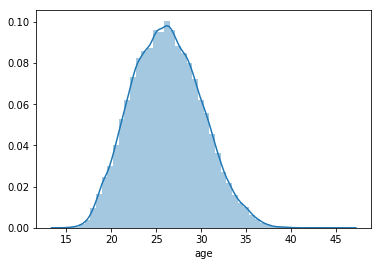

In [36]:
#Age distribution

sns.distplot(tennis_narrow["age"].dropna())
plt.show()

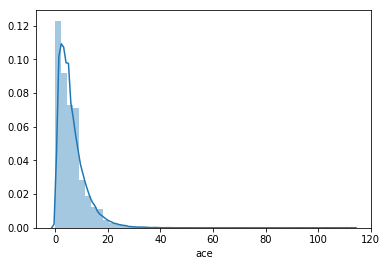

In [42]:
sns.distplot(tennis_narrow["ace"].dropna())

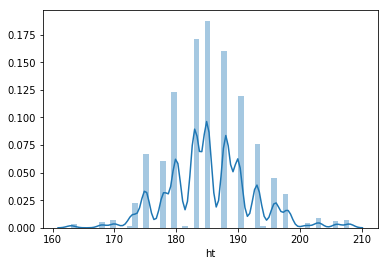

In [38]:
sns.distplot(tennis_narrow["ht"].dropna())

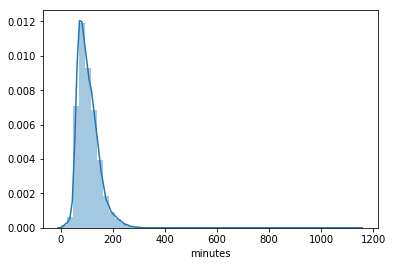

In [58]:
sns.distplot(tennis_narrow["minutes"].dropna())

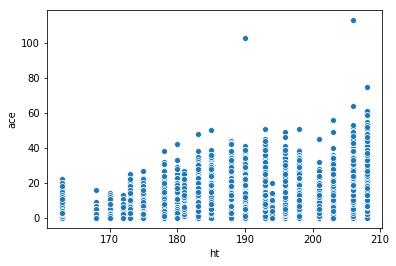

In [60]:
sns.scatterplot("ht","ace",data=tennis_narrow)

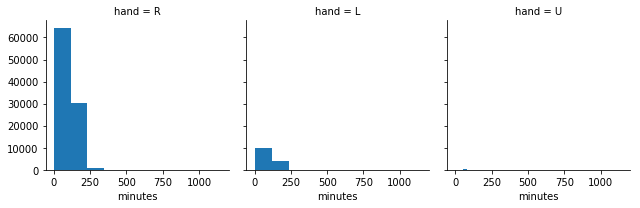

In [64]:
g = sns.FacetGrid(tennis_narrow, col="hand")
g = g.map(plt.hist, "minutes")

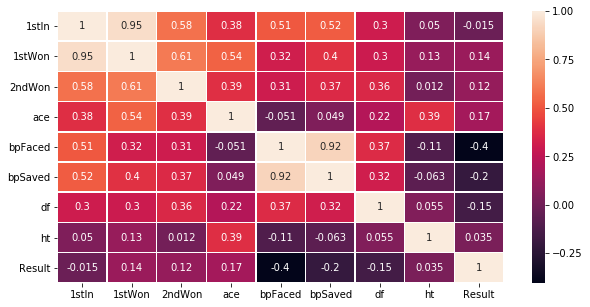

In [76]:
fig, ax = plt.subplots(figsize=(10,5))         # Sample figsize in inches
sns.heatmap(tennis_narrow[["1stIn","1stWon","2ndWon","ace","bpFaced","bpSaved","df","ht","Result"]].corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

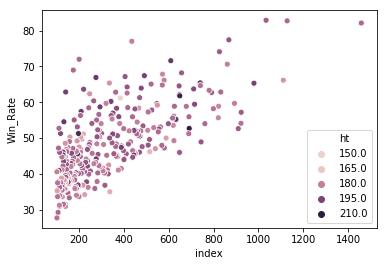

In [133]:
#Check the win rate

players = tennis_narrow.groupby(["name","Country","ht"], as_index=False).agg({"Result":"sum","ace":"mean","index":"count"}).sort_values(by="Result",ascending=False)
players["Win_Rate"] = (players["Result"]/players["index"] * 100).round(2)
players= players[players["index"]>100]

sns.scatterplot("index","Win_Rate",hue="ht",data=players)

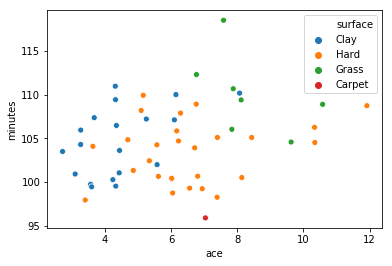

In [134]:
countries = tennis_narrow.groupby(["Country","surface"], as_index=False).agg({"Result":"sum","ace":"mean","index":"count","minutes":"mean"}).sort_values(by="Result",ascending=False)
countries["Win_RateSurface"] = (countries["Result"]/countries["index"] * 100).round(2)
countries=countries[countries["index"]>500]

sns.scatterplot("ace","minutes", hue="surface",data=countries)


In [ ]:
tenn


## Features to show stats before the game

In [34]:
top_10 = tennis_narrow["name"][(tennis_narrow["round"] == "F") & tennis_narrow["Result"] == 1].value_counts()[:10].index
top_10

Index(['Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray', 'Andy Roddick', 'Lleyton Hewitt', 'David Ferrer', 'Juan Martin Del Potro', 'Andre Agassi', 'Nikolay Davydenko'], dtype='object')

In [ ]:
total_surface["Hard"]

In [ ]:
total_surface = tennis_narrow["surface"][tennis_narrow["name"].str.contains("Federer")].value_counts()

In [ ]:
#Player Stats
total_games = tennis_narrow["index"][tennis_narrow["name"].str.contains("Federer")].count()

number_wins = tennis_narrow["Result"][(tennis_narrow["name"].str.contains("Federer")) & 
                        (tennis_narrow["Result"] == 1)].count()

number_wins_surface = tennis_narrow["Result"][(tennis_narrow["name"].str.contains("Federer")) & 
                        (tennis_narrow["Result"] == 1) & (tennis_narrow["surface"] == "Hard")].count()

total_surface = tennis_narrow["surface"][tennis_narrow["name"].str.contains("Federer")].value_counts()
win_by_surface = round(number_wins_surface/total_surface["Hard"]*100,2)

win_rate = round(number_wins/total_games*100,2)

mean_ace  = tennis_narrow["ace"][(tennis_narrow["name"].str.contains("Federer"))].mean()
titles = tennis_narrow["index"][(tennis_narrow["round"]=="F") & (tennis_narrow["name"].str.contains("Federer"))&(tennis_narrow["Result"]==1)].count()

In [ ]:
print(win_rate)
print(win_by_surface)

In [ ]:
#Confront Stats

p1_matchs = list(tennis_narrow["index"][tennis_narrow["name"].str.contains("Federer")])
p2_matchs = list(tennis_narrow["index"][tennis_narrow["name"].str.contains("Nadal")])
confronts = [m for m in p2_matchs if m in p1_matchs] #look for equal match IDs



In [ ]:
tennis_narrow[tennis_narrow["index"].isin(confronts) &(tennis_narrow["Result"] == 0)].iloc[-3:]

In [ ]:
print(win_rate)
print(mean_ace)
print(titles)


In [ ]:
tennis_narrow["name"].str.contains("Federer") & tennis_narrow["name"].str.contains("Federer")

In [ ]:
tennis_narrow.head()

In [ ]:
p1_matchs = list(tennis_narrow["index"][tennis_narrow["name"].str.contains("Federer")])
p2_matchs = list(tennis_narrow["index"][tennis_narrow["name"].str.contains("Nadal")])